<a href="https://colab.research.google.com/github/AviralTripathim22ma012/CV-2/blob/main/stereo_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

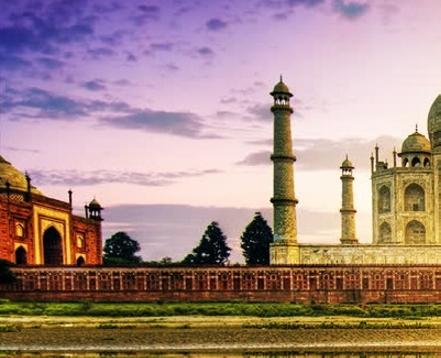

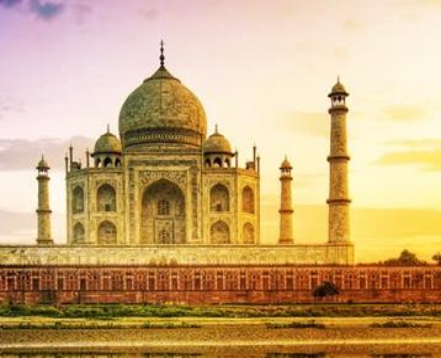

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the two images
image1 = cv2.imread('/content/1a.jpeg')
image2 = cv2.imread('/content/1b.jpeg')

# Get the dimensions of the two images
height1, width1, _ = image1.shape
height2, width2, _ = image2.shape

# If the two images have different sizes, resize them
if height1 != height2 or width1 != width2:
    # Compute the target size based on the larger of the two images
    target_height = max(height1, height2)
    target_width = max(width1, width2)

    # Resize the first image
    image1_resized = cv2.resize(image1, (target_width, target_height))

    # Resize the second image
    image2_resized = cv2.resize(image2, (target_width, target_height))

else:
    # The two images have the same size, no need to resize
    image1_resized = image1
    image2_resized = image2

# Display the two resized images
cv2_imshow(image1_resized)
cv2_imshow(image2_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()


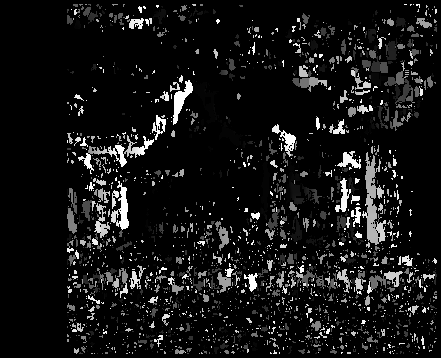

In [ ]:
# Create a stereo matcher object
matcher = cv2.StereoBM_create(numDisparities=64, blockSize=9)

image1_new=cv2.cvtColor(image1_resized, cv2.COLOR_BGR2GRAY)
image2_new=cv2.cvtColor(image2_resized, cv2.COLOR_BGR2GRAY)

# Compute the disparity map
disparity = matcher.compute(image1_new, image2_new)

# Normalize the disparity map for display
disparity_normalized = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

cv2_imshow(disparity_normalized)
cv2.waitKey(0)
cv2.destroyAllWindows()
